<a href="https://colab.research.google.com/github/kawata-yuya/kawata-yuya-Bingo-game-simulator/blob/main/%E3%83%93%E3%83%B3%E3%82%B4%E3%82%B2%E3%83%BC%E3%83%A0%E3%81%AE%E3%83%93%E3%83%B3%E3%82%B4%E3%81%99%E3%82%8B%E3%81%BE%E3%81%A7%E3%81%AE%E5%9B%9E%E6%95%B0%E3%81%AE%E7%B5%B1%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ビンゴゲームでビンゴになるまでの回数のシュミレーター
## ビンゴカードについて
リストの要素がビンゴカードに書かれている数字とする。  
穴が空いている状態はリストの要素が0(False)で表現する  




## シュミレーションに必要な関数を定義
- bingo_checker
- make_a_hole_in_the_bingo_card
- bingo_card_printer  

In [ ]:
import random, time
import matplotlib.pyplot as plt
from tqdm import tqdm


print("""### ビンゴカードのルール ###
リストの要素がビンゴカードに書かれている数字とする。
穴が空いている状態はリストの要素が0(False)で表現する
""")

def bingo_checker(bingo_card):
    """ビンゴシートがビンゴか判定する関数"""
    result = [not(any(i)) for i in bingo_card]          # 縦
    result += [not(any(i)) for i in zip(*bingo_card)]   # 横
    result += [not(any(bingo_card[i][i] for i in range(5))),
               not(any(bingo_card[i][4-i] for i in range(5)))]    # 斜め
    return any(result)


def make_a_hole_in_the_bingo_card(num, bingo_card):
    """ビンゴシートに穴をあける関数"""
    if num < 16 and (num in bingo_card[0]):
        bingo_card[0] = [i if i != num else 0 for i in bingo_card[0]]
    elif num < 31 and (num in bingo_card[1]):
        bingo_card[1] = [i if i != num else 0 for i in bingo_card[1]]
    elif num < 46 and (num in bingo_card[2]):
        bingo_card[2] = [i if i != num else 0 for i in bingo_card[2]]
    elif num < 61 and (num in bingo_card[3]):
        bingo_card[3] = [i if i != num else 0 for i in bingo_card[3]]
    elif (num in bingo_card[4]):
        bingo_card[4] = [i if i != num else 0 for i in bingo_card[4]]

    return bingo_card


def bingo_card_printer(bingo_card):
    """ビンゴシートを可視化する関数(デバッグ用)"""
    print("B I N G O")
    for ax in zip(*bingo_card):
        print(str(list(ax))+",")
    print()


def experiment():
    """ビンゴ大会を実施する関数"""
    number_list = list(range(1, 71))
    random.shuffle(number_list)

    # ビンゴカードを作成
    bingo_card = [[rand_num for rand_num in random.sample(
        list(range(i*15+1, i*15+16)), 5)] for i in range(5)]
    bingo_card[2][2] = 0

    for counter, number in enumerate(number_list, 1):
        bingo_card = make_a_hole_in_the_bingo_card(number, bingo_card)
        if bingo_checker(bingo_card):
            break

    return counter

### ビンゴカードのルール ###
リストの要素がビンゴカードに書かれている数字とする。
穴が空いている状態はリストの要素が0(False)で表現する



## シュミレーションの実行


---
### 注意
変数:number_of_samples  
に実験回数を代入してください。  






In [ ]:
# 実験の実行
number_of_samples = 1000000           # サンプル数(任意)

print("集めるサンプル数をnumber_of_samplesに代入してください。")

try:
    if not(result_list): 
        result_list = {i: 0 for i in range(1, 76)}
except:
    result_list = {i: 0 for i in range(1, 76)}

# メイン計算
print("--計算中--")
time.sleep(0.25)
for _ in tqdm(range(number_of_samples)):
    result_list[experiment()] += 1
time.sleep(0.25)
print("--計算終了--")

print(", ".join("{}:{}".format(*i) for i in result_list.items()))

集めるサンプル数をnumber_of_samplesに代入してください。
--計算中--


100%|██████████| 1000000/1000000 [04:42<00:00, 3535.44it/s]


--計算終了--
1:0, 2:0, 3:0, 4:4, 5:14, 6:39, 7:71, 8:103, 9:237, 10:338, 11:522, 12:676, 13:973, 14:1346, 15:1665, 16:2090, 17:2625, 18:3266, 19:4135, 20:4901, 21:6041, 22:7023, 23:8198, 24:9630, 25:10701, 26:12390, 27:14253, 28:15966, 29:17982, 30:19938, 31:22169, 32:24104, 33:25832, 34:28531, 35:30488, 36:32010, 37:33843, 38:35500, 39:37144, 40:38095, 41:38774, 42:39737, 43:39941, 44:39773, 45:39643, 46:38431, 47:37357, 48:35599, 49:33530, 50:31543, 51:28795, 52:26252, 53:23161, 54:20180, 55:17322, 56:14683, 57:11939, 58:9300, 59:7076, 60:5211, 61:3704, 62:2369, 63:1504, 64:772, 65:383, 66:146, 67:32, 68:0, 69:0, 70:0, 71:0, 72:0, 73:0, 74:0, 75:0


## シュミレートした結果をグラフ化

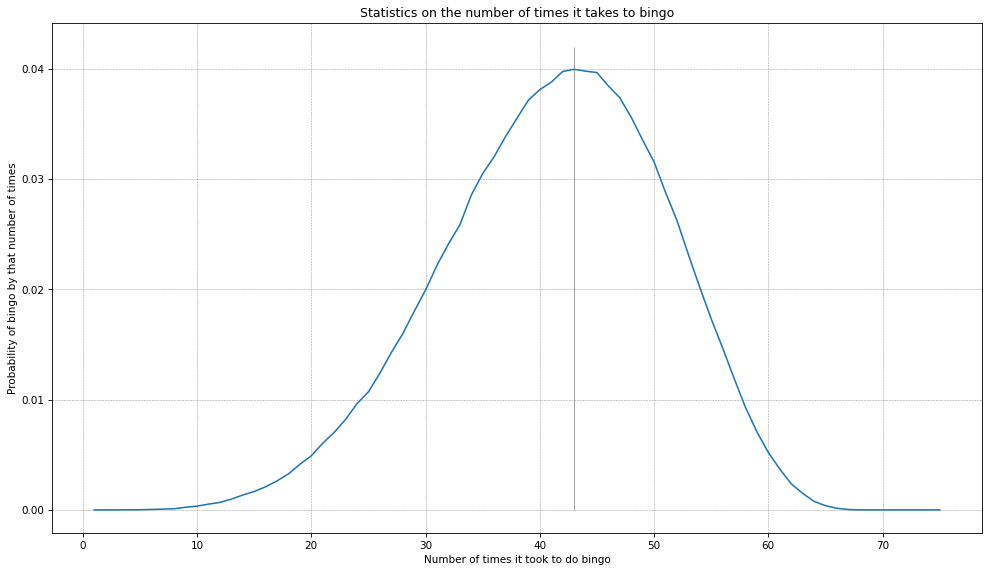

In [ ]:
# 実験結果のグラフ化
result_list_sum = sum(result_list.values())
result_list = {i:(j/result_list_sum) for i, j in result_list.items()}
result_list_mode = {i:j for i, j in result_list.items() if j == max(result_list.values())}
result_list_mode = sum(result_list_mode.keys())/len(result_list_mode)

# グラフの設定
plt.figure(figsize=(16, 9), dpi=75)
plt.plot(list(result_list.keys()), list(result_list.values()))
plt.xlabel("Number of times it took to do bingo")
plt.ylabel("Probability of bingo by that number of times")
plt.grid(which = "major", axis = "x", color = "gray", alpha = 0.8, linestyle = "--", linewidth = 0.5)
plt.grid(which = "major", axis = "y", color = "gray", alpha = 0.8, linestyle = "--", linewidth = 0.5)
plt.title("Statistics on the number of times it takes to bingo")
plt.vlines(x=result_list_mode, ymin=0, ymax=0.042, color = "gray", linewidth=0.7)

plt.show()